<a id="Import"></a>
# <p style="background-color: #0093af; font-family:Pacifico; color:#ffffff; font-size:200%; font-family:Pacifico; text-align:center; border-radius:1000px 50px;">Diabetes Detection Model</p>

# <font color='DarkSlateGrey'>⚑ Importing Libraries</font>

In [2]:
# Basic Libraries
import numpy as np # Numerical Python - arrays, matrices, mathematical functions
import pandas as pd
import seaborn as sns #  data visualization - statistical graphics
import matplotlib.pyplot as plt #  data visualization - plot customization
import pickle
# Models Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Evaluation Metric Libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score,f1_score, roc_auc_score

# Warnings
import warnings
warnings.filterwarnings('ignore')

# <font color='DarkSlateGrey'>⚑ Reading and exploring the dataset</font>

In [3]:
data = pd.read_csv('diabetes.csv')

# Comma-Separated Values (CSV)
# Age  ,  Name     ,  Target
# 21   ,  John     ,   200
# 22   ,  Sara     ,   500
# 23   ,  Olivia   ,   700

In [4]:
data.shape # Dimensions (rows, columns)

(1949, 9)

In [5]:
data.head(10) # first 10 rows/records

,Preg,Glucose,BPressure,SThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
data.tail(10)

,Preg,Glucose,BPressure,SThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1939,1,83,68,0,0,18.2,0.624,27,0
1940,6,124,72,0,0,27.6,0.368,29,1
1941,2,99,0,0,0,22.2,0.108,23,0
1942,5,109,62,41,129,35.8,0.514,25,1
1943,6,107,88,0,0,36.8,0.727,31,0
1944,6,87,80,0,0,23.2,0.084,32,0
1945,3,129,64,29,115,26.4,0.219,28,1
1946,1,100,66,29,196,32.0,0.444,42,0
1947,2,94,68,18,76,26.0,0.561,21,0
1948,0,146,82,0,0,40.5,1.781,44,0


In [7]:
data.dtypes

Preg                          int64
Glucose                       int64
BPressure                     int64
SThickness                    int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# <font color='DarkSlateGrey'>⚑ Handling Missing Values</font>

In [8]:
if data.isnull().values.any():
    print('Sorry Dear,there are missing values in the dataset\n')
    data.dropna(inplace=True)
    print('Shape : ', data.shape) 
else:
    print('There aren\'t missing values in the dataset.')

There aren't missing values in the dataset.


# <font color='DarkSlateGrey'>⚑ Handling Outliers</font>

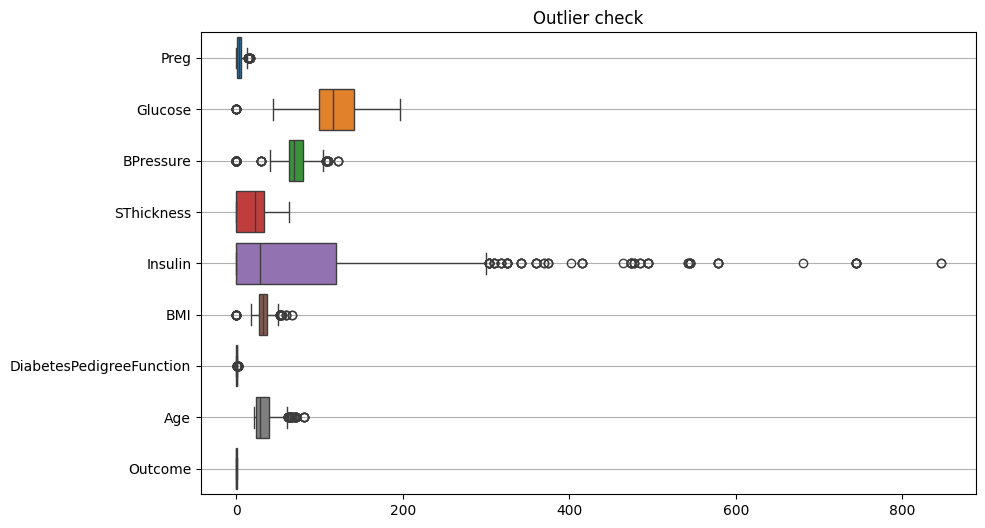

In [9]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, orient='h') # horizontal
plt.title('Outlier check')
plt.grid(axis='y')
plt.show()

# <font color='DarkSlateGrey'>⚑ Using : IQR</font>

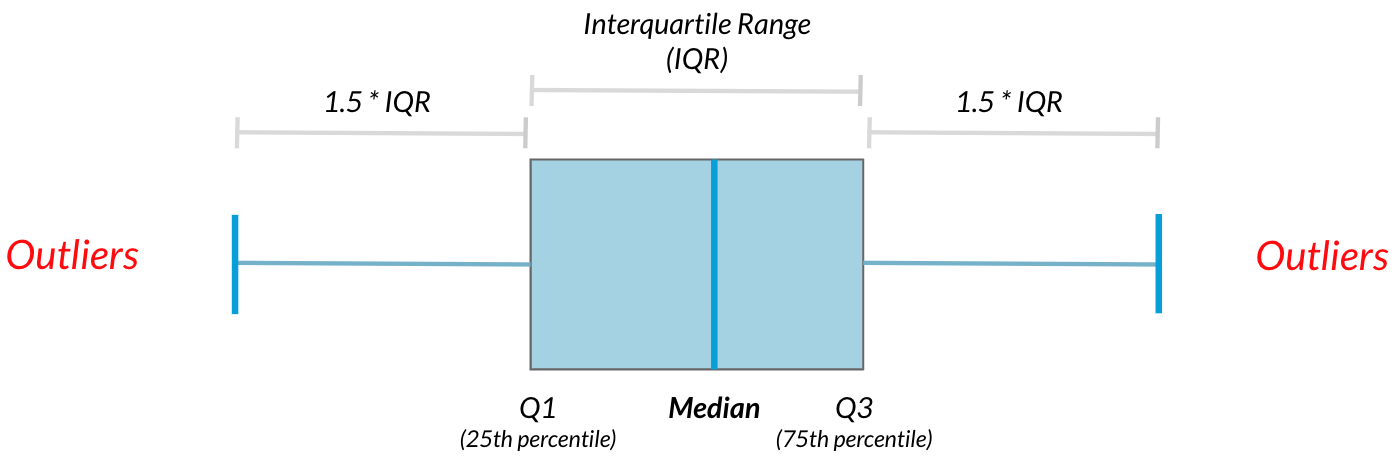

Outliers detected in the dataset. Removing them...
Outliers removed. Data shape: (1595, 9) 



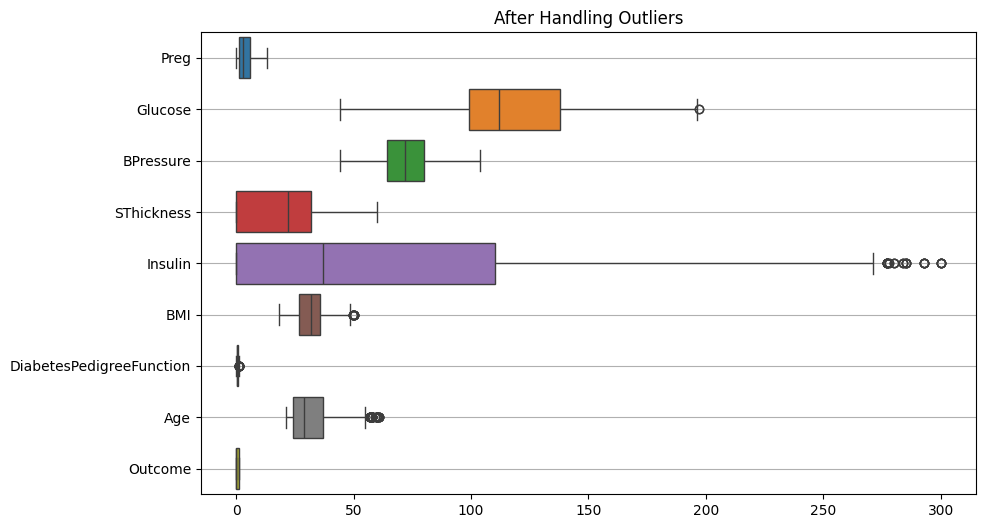

In [10]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (data < lower_bound) | (data > upper_bound)

# Check if there are any outliers
if outliers.any().any():
    print('Outliers detected in the dataset. Removing them...')
    
    # Remove outliers
    data = data[~outliers.any(axis=1)]
    data.reset_index(drop=True, inplace=True)
    
    print('Outliers removed. Data shape:', data.shape, '\n')

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, orient='h') # horizontal
    plt.title('After Handling Outliers')
    plt.grid(axis='y')
    plt.show()
else:
    print('No outliers detected in the dataset.')

In [11]:
data.columns

Index(['Preg', 'Glucose', 'BPressure', 'SThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# <font color='DarkSlateGrey'>⚑ Analysis and exploration of categories of the "Outcome" feature</font>

In [12]:
# check labels in "Outcome" feature
data['Outcome'].unique()

array([1, 0])

In [13]:
data['Outcome'].value_counts()

Outcome
0    1023
1     572
Name: count, dtype: int64

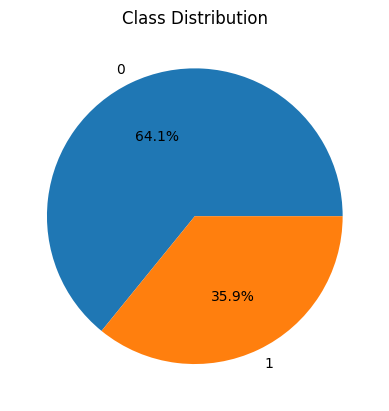

In [14]:
plt.pie(data.Outcome.value_counts().values , labels=data.Outcome.value_counts().index,autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()

In [15]:
data.head()

,Preg,Glucose,BPressure,SThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,5,116,74,0,0,25.6,0.201,30,0


# <font color='DarkSlateGrey'>⚑ The Correlations between features</font>

In [16]:
# The correlation between features
# Understanding the correlation between various features in the dataset
# Select only the numeric columns

data.corr()

,Preg,Glucose,BPressure,SThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Preg,1.000000,0.223989,0.216325,-0.064008,-0.096591,0.120975,0.048574,0.649665,0.248378
Glucose,0.223989,1.000000,0.287373,-0.008498,0.254790,0.242670,0.049341,0.285438,0.465094
BPressure,0.216325,0.287373,1.000000,0.055151,0.018250,0.349570,-0.011516,0.368813,0.184187
SThickness,-0.064008,-0.008498,0.055151,1.000000,0.498133,0.379566,0.074872,-0.132153,0.028317
Insulin,-0.096591,0.254790,0.018250,0.498133,1.000000,0.222661,0.133848,-0.015656,0.110431
BMI,0.120975,0.242670,0.349570,0.379566,0.222661,1.000000,0.084645,0.122952,0.284287
DiabetesPedigreeFunction,0.048574,0.049341,-0.011516,0.074872,0.133848,0.084645,1.000000,0.047793,0.197236
Age,0.649665,0.285438,0.368813,-0.132153,-0.015656,0.122952,0.047793,1.000000,0.274999
Outcome,0.248378,0.465094,0.184187,0.028317,0.110431,0.284287,0.197236,0.274999,1.000000


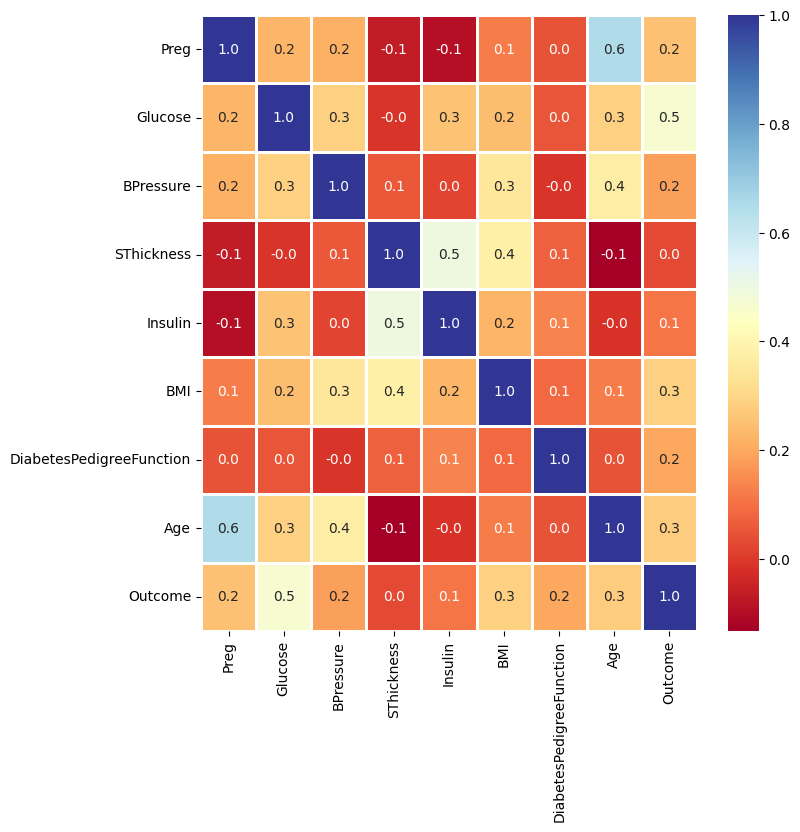

In [17]:
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(), annot=True, linewidths=0.9, fmt=".1f", cmap='RdYlBu')
plt.show()

# <font color='DarkSlateGrey'>⚑ The correlation between each feature and the "Outcome"</font>

In [18]:
corr = data[['Preg', 'Glucose', 'BPressure', 'SThickness','Insulin','BMI','DiabetesPedigreeFunction', 'Age','Outcome']].corr()['Outcome'].sort_values(ascending = False)
corr = corr.to_frame()
corr.style.background_gradient(cmap="RdYlBu")

,Outcome
Outcome,1.000000
Glucose,0.465094
BMI,0.284287
Age,0.274999
Preg,0.248378
DiabetesPedigreeFunction,0.197236
BPressure,0.184187
Insulin,0.110431
SThickness,0.028317


# <font color='DarkSlateGrey'>⚑ Dropping feature/s based on the correlation</font>

In [19]:
data.drop(['SThickness'], inplace=True, axis=1)

In [20]:
data.head() # Default : first 5 rows

,Preg,Glucose,BPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,5,116,74,0,25.6,0.201,30,0


In [21]:
data.tail() # Default : last 5 rows

,Preg,Glucose,BPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1590,6,107,88,0,36.8,0.727,31,0
1591,6,87,80,0,23.2,0.084,32,0
1592,3,129,64,115,26.4,0.219,28,1
1593,1,100,66,196,32.0,0.444,42,0
1594,2,94,68,76,26.0,0.561,21,0


In [22]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Preg,1595.0,3.770533,3.081292,0.000,1.000,3.000,6.000,13.000
Glucose,1595.0,118.452038,29.177593,44.000,99.000,112.000,138.000,197.000
BPressure,1595.0,71.889028,11.000837,44.000,64.000,72.000,80.000,104.000
Insulin,1595.0,63.586834,78.347922,0.000,0.000,37.000,110.000,300.000
BMI,1595.0,31.864326,6.573203,18.200,26.800,32.000,35.800,50.000
DiabetesPedigreeFunction,1595.0,0.438347,0.250749,0.078,0.252,0.368,0.597,1.224
Age,1595.0,31.518495,9.617014,21.000,24.000,29.000,37.000,61.000
Outcome,1595.0,0.358621,0.479746,0.000,0.000,0.000,1.000,1.000


In [23]:
data.shape # Dimensions (rows, columns)

(1595, 8)

# <font color='DarkSlateGrey'>Class Imbalance Handling</font>


In [24]:
data['Outcome'].value_counts()

Outcome
0    1023
1     572
Name: count, dtype: int64

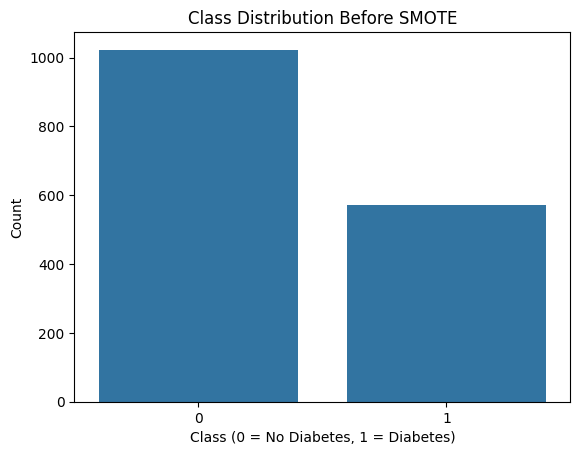

In [25]:
sns.barplot(x=data['Outcome'].value_counts().index, y=data['Outcome'].value_counts().values)
plt.xlabel("Class (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Count")
plt.title("Class Distribution Before SMOTE")
plt.show()

In [26]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [27]:
X = data.drop(columns=['Outcome'])  # Features
y = data['Outcome']  # Target variable


In [28]:

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
# Check class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_resampled))


Class distribution after SMOTE: Counter({1: 1023, 0: 1023})


In [29]:

# Convert back to DataFrame (optional)
data = pd.DataFrame(X_resampled, columns=X.columns)
data['Outcome'] = y_resampled

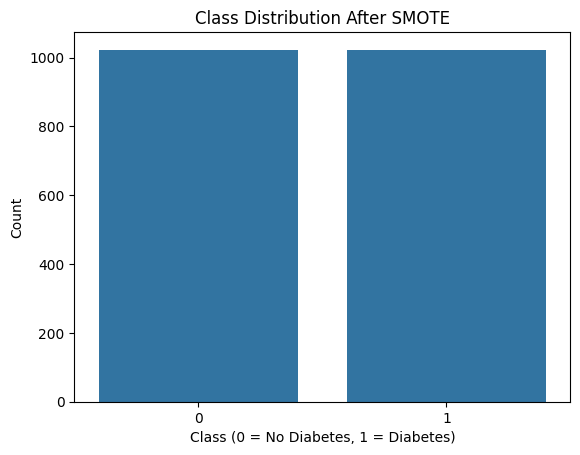

In [30]:
sns.barplot(x=data['Outcome'].value_counts().index, y=data['Outcome'].value_counts().values)
plt.xlabel("Class (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Count")
plt.title("Class Distribution After SMOTE")
plt.show()

# <font color='DarkSlateGrey'>Checking corelation after SMOTE</font>

In [31]:
corr = data[['Preg', 'Glucose', 'BPressure','Insulin','BMI','DiabetesPedigreeFunction', 'Age','Outcome']].corr()['Outcome'].sort_values(ascending = False)
corr = corr.to_frame()
corr.style.background_gradient(cmap="RdYlBu")

,Outcome
Outcome,1.000000
Glucose,0.486009
BMI,0.297248
Age,0.275289
Preg,0.241461
DiabetesPedigreeFunction,0.206701
BPressure,0.196766
Insulin,0.120558


In [32]:
data['Outcome'].value_counts()

Outcome
1    1023
0    1023
Name: count, dtype: int64

# <font color='DarkSlateGrey'>⚑ Modeling</font>

# <font color='DarkSlateGrey'>⚑ Splitting the data and target</font>

In [33]:
# X Data
X = data.drop(['Outcome'], axis=1)
print('X shape is : ' , X.shape)
print()

# y Data
y = data['Outcome']
print('y shape is : ' , y.shape)

X shape is :  (2046, 7)

y shape is :  (2046,)


# <font color='DarkSlateGrey'>⚑ Train Test Split</font>

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (1636, 7)
X_test shape is  (410, 7)
y_train shape is  (1636,)
y_test shape is  (410,)


In [62]:
print(X_train)

      Preg  Glucose  BPressure  Insulin        BMI  DiabetesPedigreeFunction  \
507      5      117         92        0  34.100000                  0.337000   
986      5      139         80      160  31.600000                  0.361000   
1386     3      170         64      225  34.500000                  0.356000   
1872     0      108         87        0  32.281128                  0.768095   
1564     3       78         50       88  31.000000                  0.248000   
...    ...      ...        ...      ...        ...                       ...   
1130     1      125         50      167  33.300000                  0.962000   
1294     2      108         62       56  25.200000                  0.128000   
860      0      104         76        0  18.400000                  0.582000   
1459     0      138         60      167  34.600000                  0.534000   
1126     1      103         80       82  19.400000                  0.491000   

      Age  
507    38  
986    25  
138

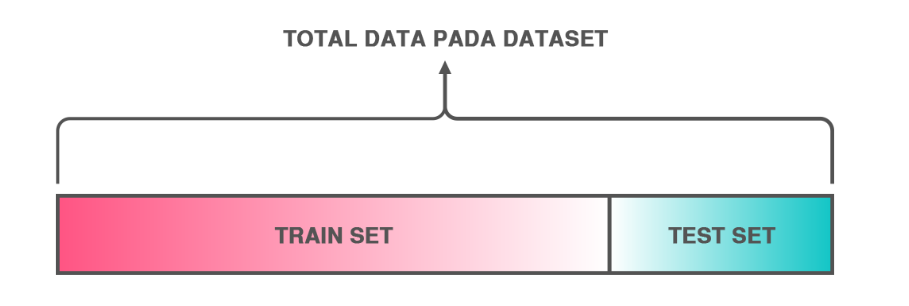

# <font color='DarkSlateGrey'>⚑ Data Scaling / Feature Scaling</font>

In [35]:
# Standardization (Z-Score Normalization) 
# StandardScaler for Data 
# scaled data is not needed for Random forest 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

# <font color='DarkSlateGrey'>⚑ Applying "Support Vector Machine" Algorithm</font>

In [36]:
Model_SVC = SVC()
Model_SVC.fit(X_train_scaled, y_train)
y_pred_SVC = Model_SVC.predict(X_test_scaled)

# Quick evaluation
Train_Accuracy = Model_SVC.score(X_train_scaled, y_train)
Test_Accuracy = Model_SVC.score(X_test_scaled, y_test)
print(f'Training accuracy: {Train_Accuracy*100:.2f} %')
print(f'Testing accuracy: {Test_Accuracy*100:.2f} %')

# Gap = 0.16

Training accuracy: 88.45 %
Testing accuracy: 87.80 %


# <font color='DarkSlateGrey'>⚑ Model Evaluation</font>

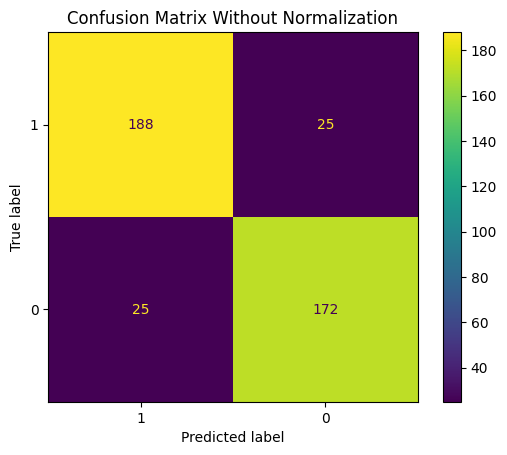

In [37]:
# Confusion Matrix

CM = confusion_matrix(y_true=y_test, y_pred=y_pred_SVC)
ConfusionMatrixDisplay(CM, display_labels=data['Outcome'].unique()).plot()
plt.title('Confusion Matrix Without Normalization')
plt.show()

In [38]:
print(classification_report(y_test, y_pred_SVC))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       213
           1       0.87      0.87      0.87       197

    accuracy                           0.88       410
   macro avg       0.88      0.88      0.88       410
weighted avg       0.88      0.88      0.88       410



In [39]:
# Accuracy = (TP + TN) / (TP + TN + FP + FN)
Accuracy_SVC = accuracy_score(y_test, y_pred_SVC)
print(f'➤➤➤ Accuracy Score : {Accuracy_SVC * 100 : .2f} %\n')


# Precision = TP / (TP + FP)
Precision_SVC = precision_score(y_test, y_pred_SVC)
print(f'➤➤➤ Precision Score : {Precision_SVC * 100 : .2f} %\n')


# Recall/Sensitivity = TP / (TP + FN)
Recall_SVC = recall_score(y_test, y_pred_SVC)
print(f'➤➤➤ Recall Score : {Recall_SVC * 100 : .2f} %\n')


# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_SVC = f1_score(y_test, y_pred_SVC)
print(f'➤➤➤ F1 Score : {F1_Score_SVC * 100 : .2f} %\n')

➤➤➤ Accuracy Score :  87.80 %

➤➤➤ Precision Score :  87.31 %

➤➤➤ Recall Score :  87.31 %

➤➤➤ F1 Score :  87.31 %



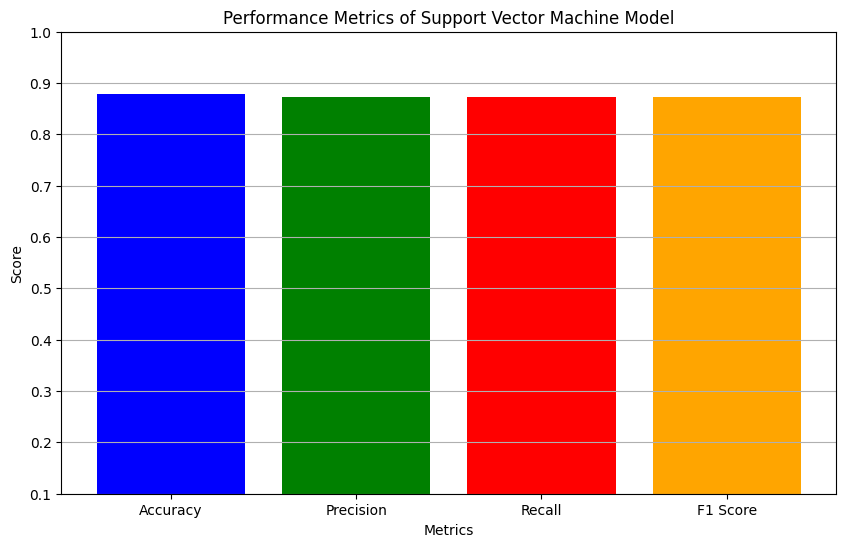

In [40]:
# Define the evaluation metrics and their scores
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [Accuracy_SVC, Precision_SVC, Recall_SVC, F1_Score_SVC]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(metrics, scores, color=['blue', 'green', 'red', 'orange'])
plt.title('Performance Metrics of Support Vector Machine Model')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0.1, 1)
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.grid(axis='y', alpha=1)
plt.show()

# <font color='DarkSlateGrey'>⚑ Applying "Logistic Regression" Algorithm</font>

In [41]:
# Initialize and train the model
Model_LR = LogisticRegression()
Model_LR.fit(X_train_scaled, y_train)


LogisticRegression()

In [42]:
# Make predictions
y_pred_LR = Model_LR.predict(X_test_scaled)


In [43]:

# Quick evaluation
Train_Accuracy_LR = Model_LR.score(X_train_scaled, y_train)
Test_Accuracy_LR = Model_LR.score(X_test_scaled, y_test)

print(f'Training accuracy: {Train_Accuracy_LR*100:.2f} %')
print(f'Testing accuracy: {Test_Accuracy_LR*100:.2f} %')


Training accuracy: 70.84 %
Testing accuracy: 76.83 %


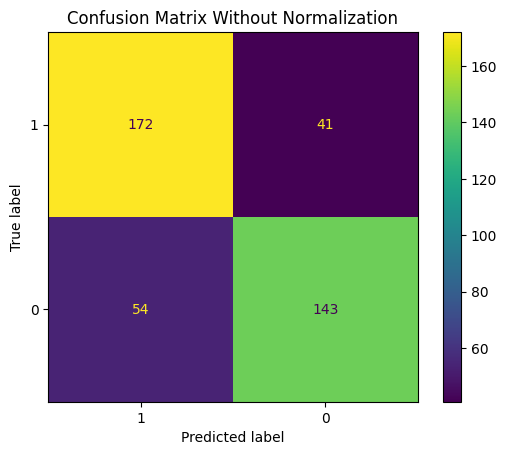

In [44]:

# Confusion Matrix
CM_LR = confusion_matrix(y_true=y_test, y_pred=y_pred_LR)
ConfusionMatrixDisplay(CM_LR, display_labels=data['Outcome'].unique()).plot()
plt.title('Confusion Matrix Without Normalization')
plt.show()


In [45]:

# Classification Report
print(classification_report(y_test, y_pred_LR))

# Accuracy
Accuracy_LR = accuracy_score(y_test, y_pred_LR)
print(f'➤➤➤ Accuracy Score : {Accuracy_LR * 100 : .2f} %\n')

# Precision
Precision_LR = precision_score(y_test, y_pred_LR)
print(f'➤➤➤ Precision Score : {Precision_LR * 100 : .2f} %\n')

# Recall
Recall_LR = recall_score(y_test, y_pred_LR)
print(f'➤➤➤ Recall Score : {Recall_LR * 100 : .2f} %\n')

# F1 Score
F1_Score_LR = f1_score(y_test, y_pred_LR)
print(f'➤➤➤ F1 Score : {F1_Score_LR * 100 : .2f} %\n')



              precision    recall  f1-score   support

           0       0.76      0.81      0.78       213
           1       0.78      0.73      0.75       197

    accuracy                           0.77       410
   macro avg       0.77      0.77      0.77       410
weighted avg       0.77      0.77      0.77       410

➤➤➤ Accuracy Score :  76.83 %

➤➤➤ Precision Score :  77.72 %

➤➤➤ Recall Score :  72.59 %

➤➤➤ F1 Score :  75.07 %



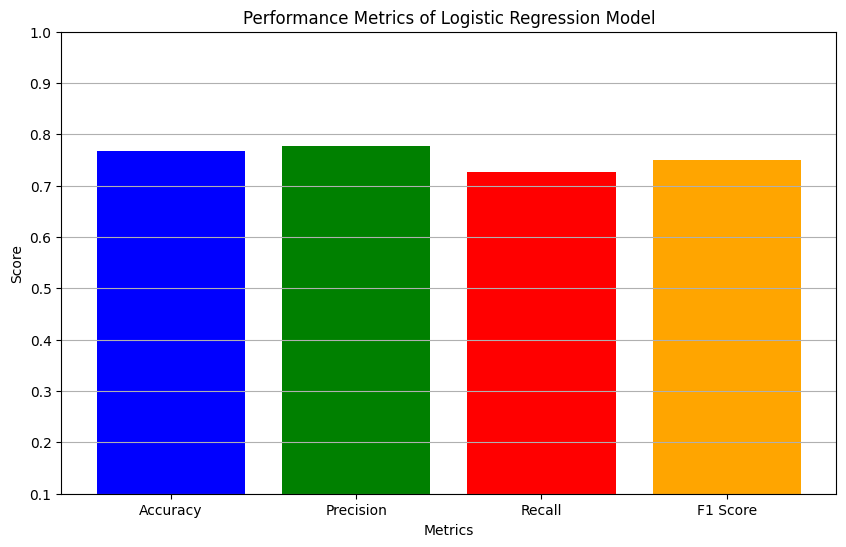

In [46]:
# Define the evaluation metrics and their scores
metrics_LR = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores_LR = [Accuracy_LR, Precision_LR, Recall_LR, F1_Score_LR]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(metrics_LR, scores_LR, color=['blue', 'green', 'red', 'orange'])
plt.title('Performance Metrics of Logistic Regression Model')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0.1, 1)
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.grid(axis='y', alpha=1)
plt.show()

# <font color='DarkSlateGrey'>⚑ Applying "Random Forest Scaled" Algorithm</font>

In [47]:
'''
Model_RF = RandomForestClassifier(random_state=42, max_depth=7)
Model_RF.fit(X_train_scaled, y_train)
y_pred_RF = Model_RF.predict(X_test_scaled)

# Quick evaluation
Train_Accuracy = Model_RF.score(X_train_scaled, y_train)
Test_Accuracy = Model_RF.score(X_test_scaled, y_test)
print(f'Training accuracy: {Train_Accuracy*100:.2f} %')
print(f'Testing accuracy: {Test_Accuracy*100:.2f} %')

# Gap = 0.00

'''

"\nModel_RF = RandomForestClassifier(random_state=42, max_depth=7)\nModel_RF.fit(X_train_scaled, y_train)\ny_pred_RF = Model_RF.predict(X_test_scaled)\n\n# Quick evaluation\nTrain_Accuracy = Model_RF.score(X_train_scaled, y_train)\nTest_Accuracy = Model_RF.score(X_test_scaled, y_test)\nprint(f'Training accuracy: {Train_Accuracy*100:.2f} %')\nprint(f'Testing accuracy: {Test_Accuracy*100:.2f} %')\n\n# Gap = 0.00\n\n"

In [48]:
'''
# Confusion Matrix

CM = confusion_matrix(y_true=y_test, y_pred=y_pred_RF)
ConfusionMatrixDisplay(CM, display_labels=data['Outcome'].unique()).plot()
plt.title('Confusion Matrix')
plt.show()

'''

"\n# Confusion Matrix\n\nCM = confusion_matrix(y_true=y_test, y_pred=y_pred_RF)\nConfusionMatrixDisplay(CM, display_labels=data['Outcome'].unique()).plot()\nplt.title('Confusion Matrix')\nplt.show()\n\n"

In [49]:
'''
print(classification_report(y_test, y_pred_RF))
'''

'\nprint(classification_report(y_test, y_pred_RF))\n'

In [50]:
'''
# Accuracy = (TP + TN) / (TP + TN + FP + FN)
Accuracy_RF = accuracy_score(y_test, y_pred_RF)
print(f'➤➤➤ Accuracy Score : {Accuracy_RF * 100 : .2f} %\n')


# Precision = TP / (TP + FP)
Precision_RF = precision_score(y_test, y_pred_RF)
print(f'➤➤➤ Precision Score : {Precision_RF * 100 : .2f} %\n')


# Recall/Sensitivity = TP / (TP + FN)
Recall_RF = recall_score(y_test, y_pred_RF)
print(f'➤➤➤ Recall Score : {Recall_RF * 100 : .2f} %\n')


# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_RF = f1_score(y_test, y_pred_RF)
print(f'➤➤➤ F1 Score : {F1_Score_RF * 100 : .2f} %\n')
'''

"\n# Accuracy = (TP + TN) / (TP + TN + FP + FN)\nAccuracy_RF = accuracy_score(y_test, y_pred_RF)\nprint(f'➤➤➤ Accuracy Score : {Accuracy_RF * 100 : .2f} %\n')\n\n\n# Precision = TP / (TP + FP)\nPrecision_RF = precision_score(y_test, y_pred_RF)\nprint(f'➤➤➤ Precision Score : {Precision_RF * 100 : .2f} %\n')\n\n\n# Recall/Sensitivity = TP / (TP + FN)\nRecall_RF = recall_score(y_test, y_pred_RF)\nprint(f'➤➤➤ Recall Score : {Recall_RF * 100 : .2f} %\n')\n\n\n# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))\nF1_Score_RF = f1_score(y_test, y_pred_RF)\nprint(f'➤➤➤ F1 Score : {F1_Score_RF * 100 : .2f} %\n')\n"

In [51]:
'''
# Define the evaluation metrics and their scores
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [Accuracy_RF, Precision_RF, Recall_RF, F1_Score_RF]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(metrics, scores, color=['blue', 'green', 'red', 'orange'])
plt.title('Performance Metrics of Random Forest Model')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0.1, 1)
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.grid(axis='y', alpha=1)
plt.show()

'''

"\n# Define the evaluation metrics and their scores\nmetrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']\nscores = [Accuracy_RF, Precision_RF, Recall_RF, F1_Score_RF]\n\n# Plotting the bar chart\nplt.figure(figsize=(10, 6))\nplt.bar(metrics, scores, color=['blue', 'green', 'red', 'orange'])\nplt.title('Performance Metrics of Random Forest Model')\nplt.xlabel('Metrics')\nplt.ylabel('Score')\nplt.ylim(0.1, 1)\nplt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])\nplt.grid(axis='y', alpha=1)\nplt.show()\n\n"

# <font color='DarkSlateGrey'>⚑ Applying "Random Forest Not Scaled" Algorithm</font>

In [52]:
# Initialize and train the model
Model_RF2 = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
Model_RF2.fit(X_train, y_train)  # No need to scale for Random Forest


RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

In [53]:

# Make predictions
y_pred_RF2 = Model_RF2.predict(X_test)


In [54]:

# Quick evaluation
Train_Accuracy_RF2 = Model_RF2.score(X_train, y_train)
Test_Accuracy_RF2 = Model_RF2.score(X_test, y_test)

print(f'Training accuracy: {Train_Accuracy_RF2*100:.2f} %')
print(f'Testing accuracy: {Test_Accuracy_RF2*100:.2f} %')


Training accuracy: 99.88 %
Testing accuracy: 99.02 %


In [55]:
from sklearn.model_selection import cross_val_score

# Perform 5-Fold Cross-Validation
cv_scores_RF2 = cross_val_score(Model_RF2, X_train, y_train, cv=5)

# Print Cross-Validation Scores
print(f'Cross-validation scores: {cv_scores_RF2}')
print(f'Mean accuracy: {cv_scores_RF2.mean() * 100:.2f} %')
print(f'Standard deviation: {cv_scores_RF2.std() * 100:.2f} %')


Cross-validation scores: [0.99085366 0.97247706 0.96636086 0.97859327 0.98776758]
Mean accuracy: 97.92 %
Standard deviation: 0.92 %


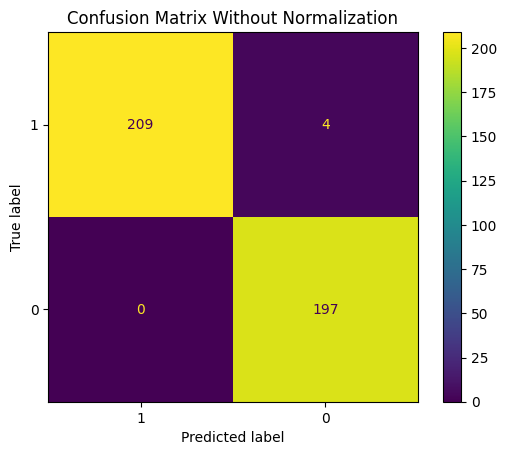

In [56]:

# Confusion Matrix
CM_RF2 = confusion_matrix(y_true=y_test, y_pred=y_pred_RF2)
ConfusionMatrixDisplay(CM_RF2, display_labels=data['Outcome'].unique()).plot()
plt.title('Confusion Matrix Without Normalization')
plt.show()


In [57]:

# Classification Report
print(classification_report(y_test, y_pred_RF2))

# Accuracy
Accuracy_RF2 = accuracy_score(y_test, y_pred_RF2)
print(f'➤➤➤ Accuracy Score : {Accuracy_RF2 * 100 : .2f} %\n')

# Precision
Precision_RF2 = precision_score(y_test, y_pred_RF2)
print(f'➤➤➤ Precision Score : {Precision_RF2 * 100 : .2f} %\n')

# Recall
Recall_RF2 = recall_score(y_test, y_pred_RF2)
print(f'➤➤➤ Recall Score : {Recall_RF2 * 100 : .2f} %\n')

# F1 Score
F1_Score_RF2 = f1_score(y_test, y_pred_RF2)
print(f'➤➤➤ F1 Score : {F1_Score_RF2 * 100 : .2f} %\n')


              precision    recall  f1-score   support

           0       1.00      0.98      0.99       213
           1       0.98      1.00      0.99       197

    accuracy                           0.99       410
   macro avg       0.99      0.99      0.99       410
weighted avg       0.99      0.99      0.99       410

➤➤➤ Accuracy Score :  99.02 %

➤➤➤ Precision Score :  98.01 %

➤➤➤ Recall Score :  100.00 %

➤➤➤ F1 Score :  98.99 %



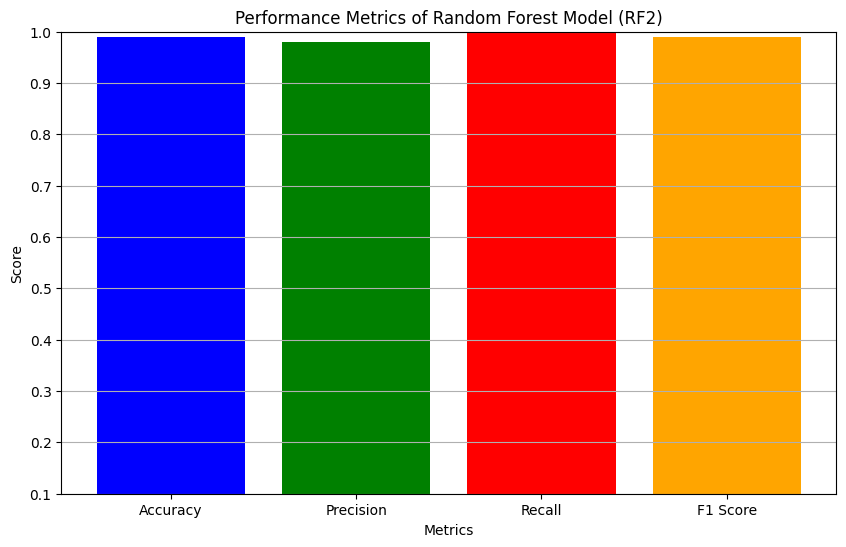

In [58]:

# Define the evaluation metrics and their scores
metrics_RF2 = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores_RF2 = [Accuracy_RF2, Precision_RF2, Recall_RF2, F1_Score_RF2]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(metrics_RF2, scores_RF2, color=['blue', 'green', 'red', 'orange'])
plt.title('Performance Metrics of Random Forest Model (RF2)')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0.1, 1)
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.grid(axis='y', alpha=1)
plt.show()


# <font color='DarkSlateGrey'>⚑ Model Evaluation</font>

# <font color='DarkSlateGrey'>⚑ Final Evaluation</font>

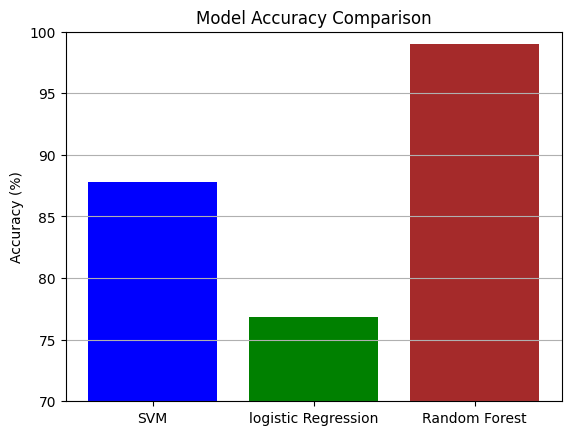

In [59]:
Classifiers = ['SVM', 'logistic Regression', 'Random Forest']
Accuracies = [(Accuracy_SVC * 100), (Accuracy_LR * 100), (Accuracy_RF2 * 100)]
plt.bar(Classifiers, Accuracies, color=['blue', 'green', 'brown'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.ylim(70, 100)
plt.grid(axis='y', alpha=1)
plt.show()

# <font color='DarkSlateGrey'>⚑ Saving the best Model using pickle</font>

In [ ]:
import pickle

with open("../saved_models/diabetes_model.pkl", "wb") as model:
    pickle.dump(Model_RF2, model)

print("Model is saved Succesfully ")


Model is saved Succesfully 


In [1]:
import pickle  

# Load the trained model
with open("../saved_models/diabetes_model.pkl", "rb") as model_file:
    loaded_model = pickle.load(model_file)

print(" Model loaded successfully!")


 Model loaded successfully!
